In [73]:
# === Configuración de entorno para importar desde 'src/' ===
import sys
from pathlib import Path

# Detectar raíz del proyecto (sube desde notebooks/reporting/)
project_root = Path.cwd().parents[1]
src_path = project_root / "src"

# Asegurar que src esté en sys.path
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

# === Intentar importar cada módulo ===
try:
    from preprocessing.preprocess import process_data
    print("O ----- preprocessing.preprocess importado correctamente.")
except Exception as e:
    print("X ----- Error en preprocessing.preprocess:", e)

try:
    from analysis.features import FeatureExtractor
    print("O ----- analysis.features importado correctamente.")
except Exception as e:
    print("X ----- Error en analysis.features:", e)

try:
    from analysis.statistics import (
        separability_measure,
        compute_covariance_matrix,
        compute_eigen_decomposition,
        anova_test,
        compute_fisher_ratio,
        
    )
    print("O ----- analysis.statistics importado correctamente.")
except Exception as e:
    print("X ----- Error en analysis.statistics:", e)

try:
    from analysis.model import train_and_evaluate_logistic_regression
    print("O ----- analysis.model importado correctamente.")
except Exception as e:
    print("X ----- Error en analysis.model:", e)

try:
    import visualization.plots as plots
    print("O ----- visualization.plots importado correctamente.")
except Exception as e:
    print("X ----- Error en visualization.plots:", e)



O ----- preprocessing.preprocess importado correctamente.
O ----- analysis.features importado correctamente.
O ----- analysis.statistics importado correctamente.
O ----- analysis.model importado correctamente.
O ----- visualization.plots importado correctamente.


In [75]:
import importlib
import visualization.plots

importlib.reload(visualization.plots)
print(dir(visualization.plots))


['Axes3D', 'Path', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_save_or_show_plot', 'generate_and_save_descriptive_statistics', 'np', 'pd', 'plot_3d_scatter', 'plot_eigenvectors_2d', 'plot_feature_density', 'plot_features_boxplot', 'plot_generic_2d_line', 'plot_normalized_variables', 'plot_pairplot', 'plot_pca_dimensionality_reduction', 'plt', 'sns']


In [59]:


project_root = Path.cwd().parents[1]
print(project_root)


c:\Users\juane\OneDrive\Documentos\DOCUMENTOS MAESTRIA\programacion cientifica


In [ ]:
# === 1. Preprocesamiento ===

print("--- Preprocessing ---")
data = process_data(
    
    input_path= project_root / "data/raw/data.csv",
    output_path=project_root / "data/processed/cleaned_data.csv"
)

--- Preprocessing ---
Cleaned and scaled data saved to: c:\Users\juane\OneDrive\Documentos\DOCUMENTOS MAESTRIA\programacion cientifica\data\processed\cleaned_data.csv


In [64]:
# === 2. Extracción de características ===

print("--- Feature Extraction ---")
features = FeatureExtractor(data)
columns = data.columns[1:-1]  # Ignorar columna de tiempo y etiqueta

time_features = features.extract_time_features(columns)
freq_features = features.extract_frequency_features(columns)
deriv_features = features.extract_derivative_features(columns)
# dist_features = features.extract_distribution_features(columns)  # Si la quieres activar

--- Feature Extraction ---


In [65]:
# === 3. Estadística y separabilidad ===

print("--- Separability Analysis ---")
label_col = data.columns[-1]  # Suponemos que la última columna es la etiqueta
separability = separability_measure(data, columns.tolist(), label_col)

--- Separability Analysis ---


In [67]:
# === 4. Visualización ===

print("--- Visualizations ---")

data_dir = Path(project_root /"results/figures")
data_dir.mkdir(parents=True, exist_ok=True)

plots.plot_features_boxplot(data, output_path=data_dir / "boxplot.png")
plots.plot_pairplot(data, hue_col=label_col, output_path=data_dir / "pairplot.png")
plots.plot_feature_density(data, features=columns.tolist(), hue_col=label_col, output_path=data_dir / "density.png")

--- Visualizations ---
Box plot guardado en: c:\Users\juane\OneDrive\Documentos\DOCUMENTOS MAESTRIA\programacion cientifica\results\figures\boxplot.png


c:\Users\juane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\juane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\juane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\juane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\juane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The mark

--- PCA Analysis ---


TypeError: quiver() takes from 2 to 5 positional arguments but 8 were given

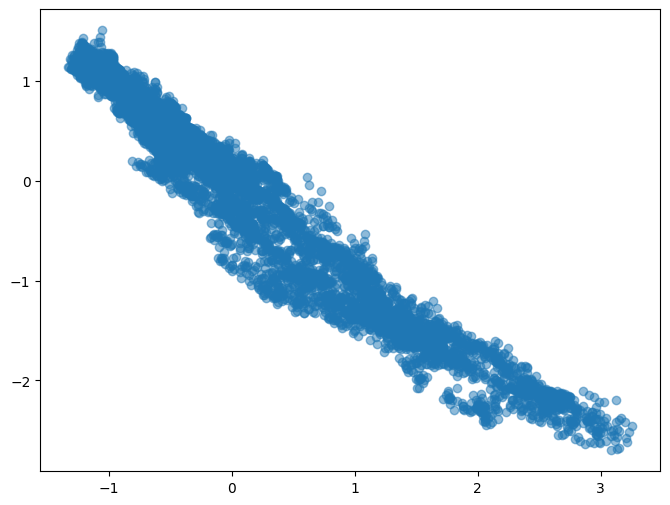

In [78]:
# === 5. PCA ===




print("--- PCA Analysis ---")
cov_matrix = compute_covariance_matrix(data, columns.tolist(), output_path=Path(project_root / "results/tables/cov_matrix.csv"))
eig_vals, eig_vecs = compute_eigen_decomposition(cov_matrix)
plots.plot_eigenvectors_2d(
    data_matrix=data[columns].values,
    eigenvalues=eig_vals,
    eigenvectors=eig_vecs,
    column_names=columns.tolist(),
    output_path=data_dir / "eigenvectors.png"
)


X_pca = FeatureExtractor.apply_pca_transformation(data, n_components=2)
plots.plot_pca_dimensionality_reduction(X_pca, data[label_col], output_path=data_dir / "pca_reduction.png")

In [ ]:
# === 6. Modelo ML ===
from src.analysis.model import train_and_evaluate_logistic_regression
print("--- Model Training ---")
metrics = train_and_evaluate_logistic_regression(data, features=columns.tolist(), target=label_col)

In [ ]:
# === 7. Exportar resumen ===
summary_path = Path("results/tables/summary_metrics.csv")
summary_path.parent.mkdir(parents=True, exist_ok=True)
pd.DataFrame([metrics]).to_csv(summary_path, index=False)

print("\n✅ Proyecto ejecutado con éxito. Resultados guardados en 'results/'.")